In [212]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. EDA

In [213]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 1.1 Creating some plots using **seaborn**

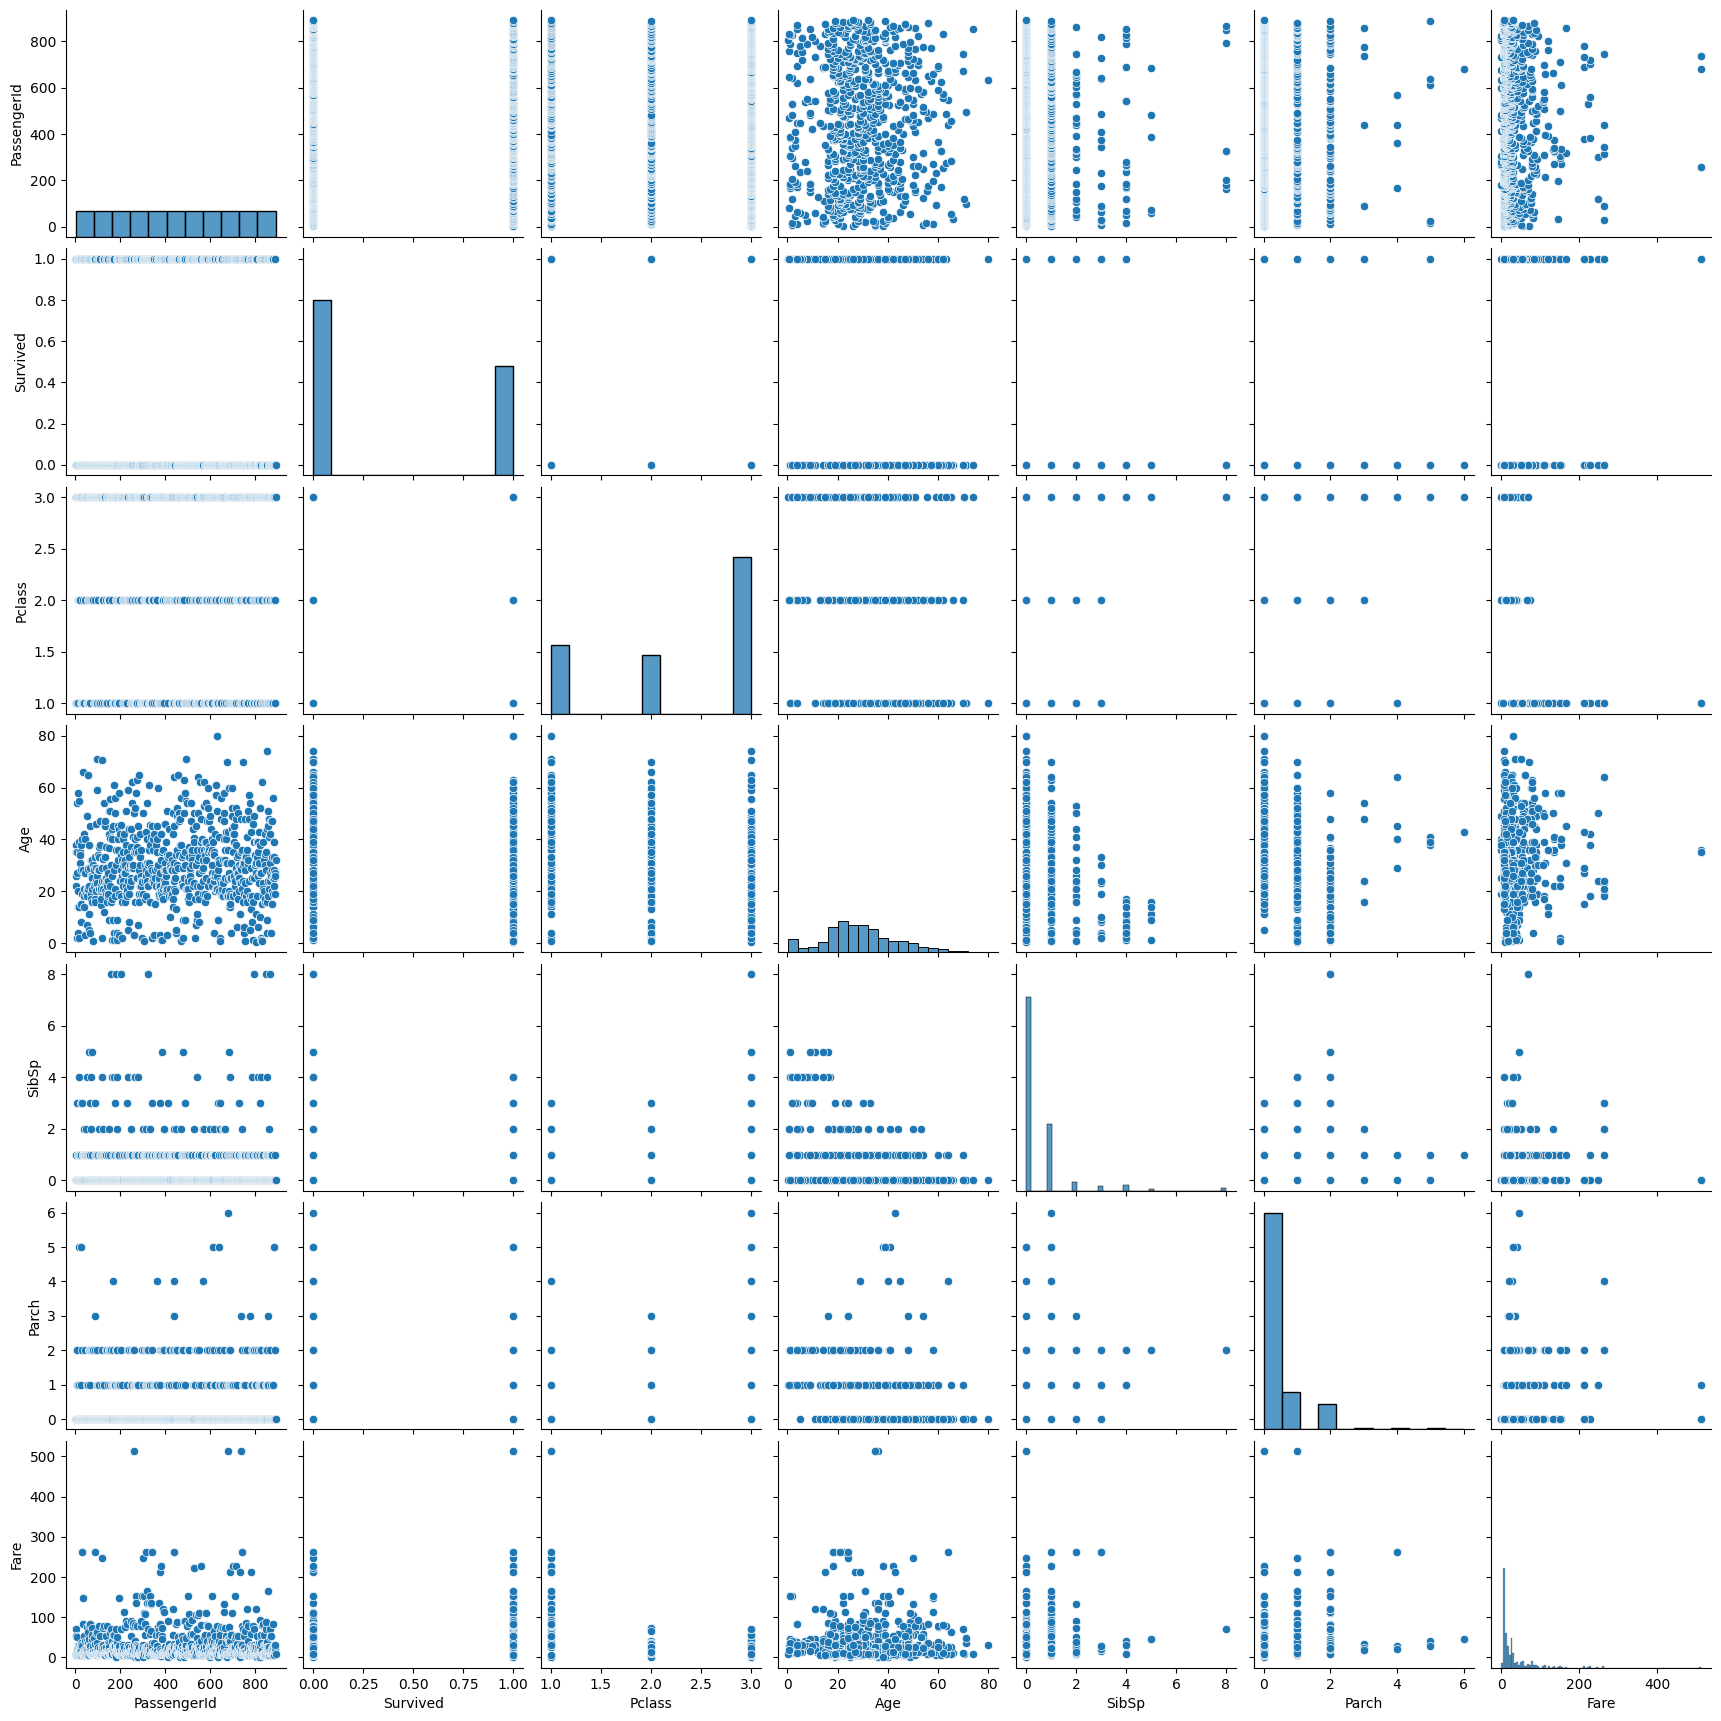

In [215]:
sns.pairplot(train_data)

# 1.2 Pair plots between sex

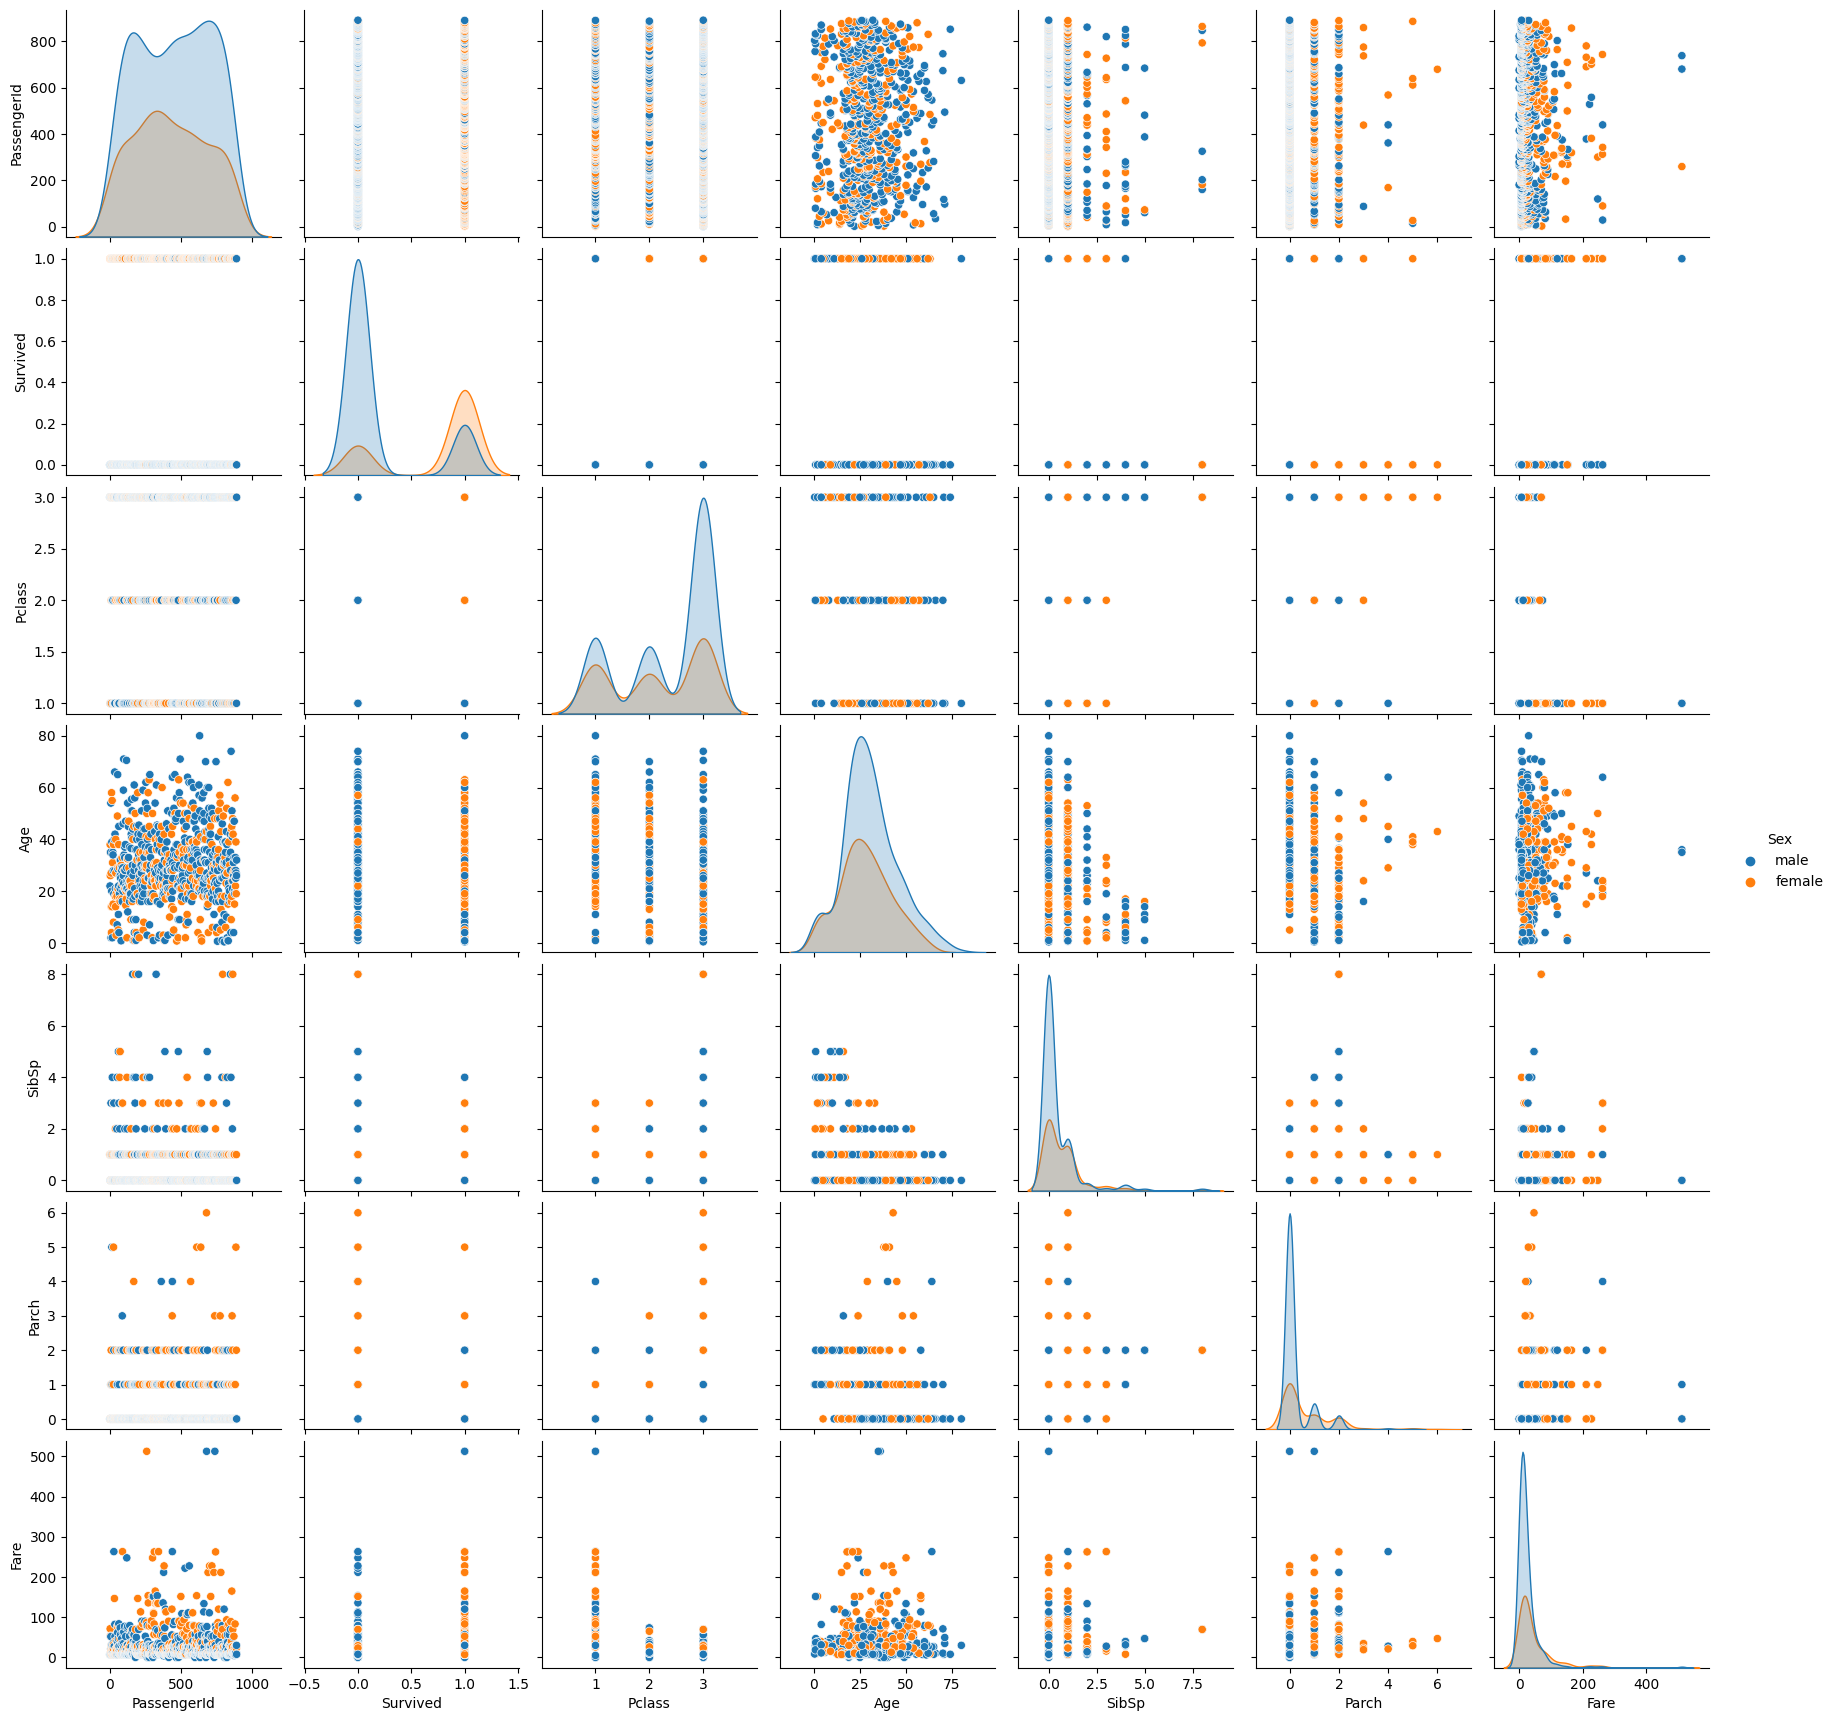

In [216]:
sns.pairplot(train_data, hue='Sex')

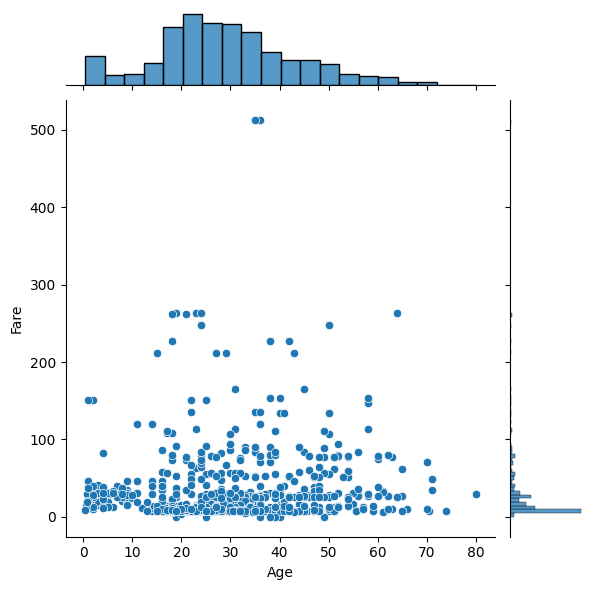

In [217]:
sns.jointplot(x='Age', y='Fare', data=train_data)

<Axes: xlabel='Sex', ylabel='Age'>

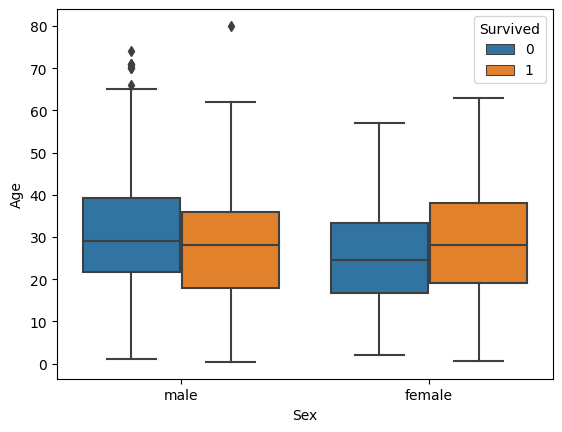

In [218]:
sns.boxplot(x='Sex', y='Age', data=train_data, hue="Survived")

<Axes: xlabel='Sex', ylabel='Age'>

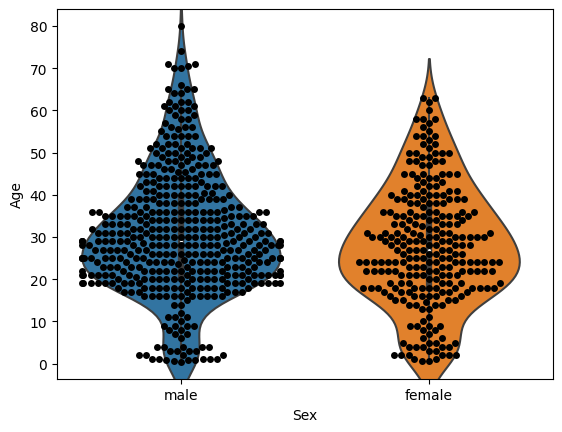

In [219]:
sns.violinplot(x='Sex', y='Age', data=train_data)
sns.swarmplot(x='Sex', y='Age', data=train_data, color='black')

In [220]:
# test_data[["FirstName", "LastName"]] = pd.DataFrame(test_data["Name"]
#                                                 .str.split(", ",expand=True), index = train_data.index)
# test_data = test_data.drop('Name', axis=1)
# print(test_data)

In [221]:
# # train_data[['FirstName', 'LastName']] = 
# train_data[["FirstName", "LastName"]] = pd.DataFrame(train_data["Name"]
#                                                 .str.split(", ",expand=True), index = train_data.index)
# train_data = train_data.drop('Name', axis=1)
# print(train_data)

# 2. Feature Engineering

Fill NaN with mean

In [222]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

New features from age with groups

In [223]:
train_data['Age'] = train_data['Age'].astype(str).str.strip('+').astype(float)
train_data  = train_data.join(pd.get_dummies(pd.cut(train_data['Age'],
                           bins=(0,18,25,29,50,69,np.inf), 
                           labels=['Under 18','19_to_25','26_to_29','30_to_50', '51_to_69', 'Over 70'])))

print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [224]:
test_data['Age'] = test_data['Age'].astype(str).str.strip('+').astype(float)
test_data  = test_data.join(pd.get_dummies(pd.cut(test_data['Age'],
                           bins=(0,18,25,29,50,69,np.inf), 
                           labels=['Under 18','19_to_25','26_to_29','30_to_50', '51_to_69', 'Over 70'])))

print(test_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex       Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.50000      0      0 

New random feature for expreriments (not sure it will works :D)

In [225]:
train_data["new_feature_1"] = train_data["SibSp"] + train_data["Parch"] + train_data["Pclass"]
test_data["new_feature_1"] = test_data["SibSp"] + test_data["Parch"] + test_data["Pclass"]

# train_data['new_future_SibSp_Parch_Pclass'].fillna(train_data['new_future_SibSp_Parch_Pclass'].mean(), inplace=True)
# test_data['new_future_SibSp_Parch_Pclass'].fillna(test_data['new_future_SibSp_Parch_Pclass'].mean(), inplace=True)

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Under 18,19_to_25,26_to_29,30_to_50,51_to_69,Over 70,new_feature_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False,False,False,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,False,False,False,True,False,False,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,False,False,False,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,False,False,False,True,False,False,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,False,False,False,True,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,False,False,True,False,False,False,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,False,True,False,False,False,False,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,False,False,False,True,False,False,6
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,False,False,True,False,False,False,1


Normalize data

In [226]:
for column in train_data.columns:
    if train_data[column].dtype == 'int64':
        train_data[column] = train_data[column].astype(float)
        
for column in test_data.columns:
    if test_data[column].dtype == 'int64':
        test_data[column] = test_data[column].astype(float)

        
for column in test_data.columns:
    if test_data[column].dtype == 'bool':
        continue
    if test_data[column].dtype == 'object':
        continue
    test_data[column] = (test_data[column] - test_data[column].min()) / (test_data[column].max() - test_data[column].min())
    
for column in train_data.columns:
    if train_data[column].dtype == 'bool':
        continue
    if train_data[column].dtype == 'object':
        continue
    train_data[column] = (train_data[column] - train_data[column].min()) / (train_data[column].max() - train_data[column].min())

print(train_data.dtypes)

PassengerId      float64
Survived         float64
Pclass           float64
Name              object
Sex               object
Age              float64
SibSp            float64
Parch            float64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Under 18            bool
19_to_25            bool
26_to_29            bool
30_to_50            bool
51_to_69            bool
Over 70             bool
new_feature_1    float64
dtype: object


# 3. Create y-target and train, test

In [227]:
y = train_data["Survived"]

features = ["Pclass", "Fare", "Sex", "SibSp", "Parch", 'Embarked',
            "Under 18", "19_to_25", "26_to_29", "30_to_50", "51_to_69", "Over 70"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
X

,Pclass,Fare,SibSp,Parch,Under 18,19_to_25,26_to_29,30_to_50,51_to_69,Over 70,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.014151,0.125,0.000000,False,True,False,False,False,False,False,True,False,False,True
1,0.0,0.139136,0.125,0.000000,False,False,False,True,False,False,True,False,True,False,False
2,1.0,0.015469,0.000,0.000000,False,False,True,False,False,False,True,False,False,False,True
3,0.0,0.103644,0.125,0.000000,False,False,False,True,False,False,True,False,False,False,True
4,1.0,0.015713,0.000,0.000000,False,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.025374,0.000,0.000000,False,False,True,False,False,False,False,True,False,False,True
887,0.0,0.058556,0.000,0.000000,False,True,False,False,False,False,True,False,False,False,True
888,1.0,0.045771,0.125,0.333333,False,False,False,True,False,False,True,False,False,False,True
889,0.0,0.058556,0.000,0.000000,False,False,True,False,False,False,False,True,True,False,False


# 4. Using Random Forest we get 95% accuracy, but only for this test set.

In [228]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
model = random_forest.fit(X, y)

predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

accuracy = round(random_forest.score(X, y) * 100, 2)
print("accuracy:", accuracy)

Your submission was successfully saved!
accuracy: 95.17


# Thanks!